<a href="https://colab.research.google.com/github/AEnguerrand/th-ml-project/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TH ML Project

## Mount dataset from my Google Drive

In [5]:
from google.colab import drive
drive.mount("/content/drive")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
^C


In [0]:
import pandas as pd # data processing
training_set = pd.read_csv('/content/drive/My Drive/thmldata/training_set.csv')
training_set_metadata = pd.read_csv('/content/drive/My Drive/thmldata/training_set_metadata.csv')

## Read dataset (training)

In [7]:
training_set.sample(5)

,object_id,mjd,passband,flux,flux_err,detected
1088621,72101996,59995.2620,2,0.873515,2.653833,0
1367858,121274615,60460.4099,3,-13.369308,12.600179,0
167791,87467,60345.1528,1,-20.263390,1.079504,1
278811,142867,60508.3014,5,248.797714,7.638628,1
103286,55354,60165.1524,3,6.804470,1.372238,0


In [8]:
training_set_metadata.sample(5)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
3730,37113366,175.078125,-3.732834,271.117843,54.685162,0,0.6175,0.5974,0.0186,42.7275,0.019,90
1274,209911,358.648071,-46.375080,329.462659,-67.716008,1,1.2191,1.2122,0.0186,44.6172,0.009,88
70,12872,347.861847,-61.943836,321.519104,-51.424048,1,0.0000,0.0000,0.0000,NaN,0.017,65
7644,126367996,145.152435,-59.677784,280.906492,-5.235352,0,0.3105,0.3413,0.0312,41.2805,0.446,90
3116,22507612,223.242188,-30.865255,331.593781,25.156997,0,0.3705,0.3979,0.6723,41.6712,0.116,90


In [9]:
unique_targets = training_set_metadata.target.unique()
print ("There are {} unique targets.".format(len(unique_targets)))
print (unique_targets)

There are 14 unique targets.
[92 88 42 90 65 16 67 95 62 15 52  6 64 53]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


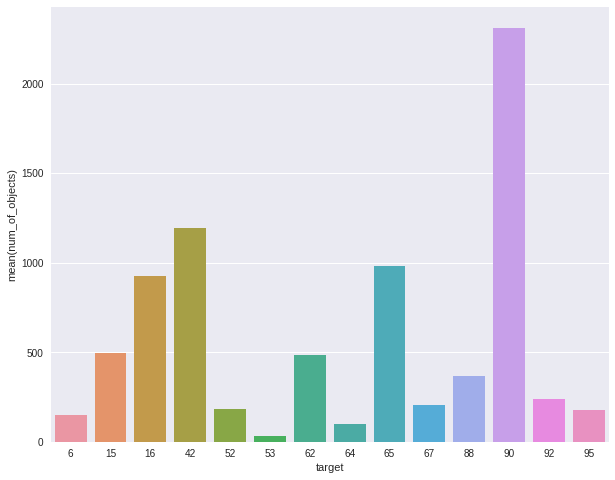

In [10]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

objects_per_target = pd.DataFrame(training_set_metadata.groupby("target", as_index = False)["object_id"].count())
objects_per_target = objects_per_target.rename(columns = {"object_id": "num_of_objects"})
fig = plt.figure(figsize=(10,8))
sb.barplot(x =objects_per_target.target, y = objects_per_target.num_of_objects);

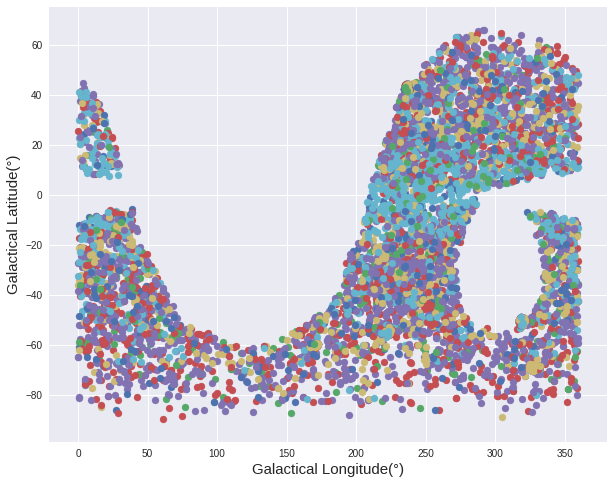

In [11]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for class_target in unique_targets:
    class_used = training_set_metadata[training_set_metadata.target == class_target]
    ax.scatter(x = class_used.gal_l, y = class_used.gal_b, alpha = 1)
plt.xlabel("Galactical Longitude(°)", fontsize = 15)
plt.ylabel("Galactical Latitude(°)", fontsize = 15);